In [ ]:
import numpy as np 
import pandas as pd
import re,math,random
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Kaggle/

Mounted at /content/drive/
/content/drive/MyDrive/Kaggle


In [ ]:
t1=pd.read_csv('train.csv')
t2=pd.read_csv('test.csv')
t3=pd.read_csv('submit.csv')
t2['label']=t3['label']

In [ ]:
t=pd.concat([t2,t1])

In [ ]:
#sz is Size of entire dataset including test + train
sz=len(t)
def modifydatabag(t1):
  res=[]
  a=int(sz*0.63)
  start=0
  end=len(t1)
  for i in range(a):
    res.append(t1.iloc[random.randrange(start,end)])
  return res
#pass only test dataset for modification
data=modifydatabag(t1)
df = pd.DataFrame(data, columns=['id', 'title', 'author','text','label'])
df.head(1)

#use the res dataset in ur code and send me predicted values

,id,title,author,text,label
2266,2266,"‘To Age Is a Sin’: In Blunt Speech, Madonna Co...",Eli Rosenberg,"In the world of pop music, women are enjoying ...",0


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

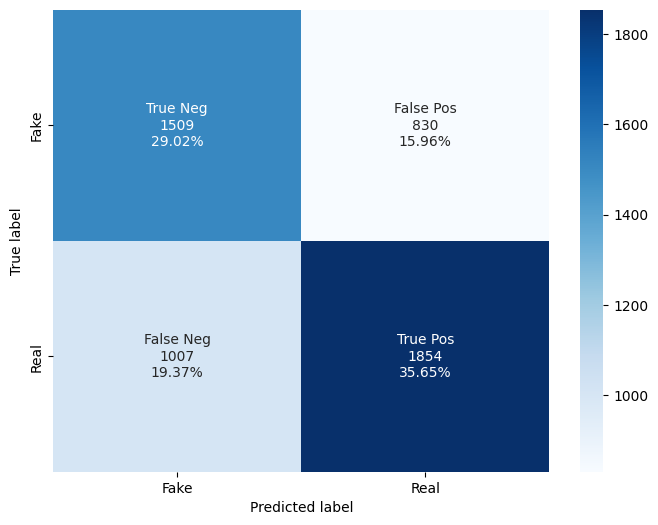

In [ ]:
from sys import displayhook
import pandas as pd
import re
import numpy as np 
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf, group_names=None, categories='auto', count=True, percent=True, cbar=True, xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')
    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=(8,6))
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    if title:
        plt.title(title)

# load Fake.csv and True.csv
real_path = pd.read_csv('isot-fake-news-dataset/Fake.csv')
fake_path = pd.read_csv('isot-fake-news-dataset/True.csv')

#preprocessing
def create_total_dataset(real_path, fake_path):
    real = pd.read_csv('isot-fake-news-dataset/True.csv')
    fake = pd.read_csv('isot-fake-news-dataset/Fake.csv')

    #The shape of the real news dataset
    print("Real news: ",real.shape)
    #Shape of fake news dataset
    print("Fake News: ", fake.shape)

    # "Assigning a value of 0 for all the real news data and placing it in the data frame."
    class0 = [0 for i in range(real.shape[0])]
    real.insert(4, "class", class0, True)

    #Assigning 1 to all fake news data and placing it in the data frame
    class1 = [1 for i in range(fake.shape[0])]
    fake.insert(4, "class", class1, True)

    #Merging fake news and real news into a single dataset with a total of 1.    
    total = pd.concat([real,fake])
    total["title_text"] = total["title"] + " " + total["text"]
    total = total[["title_text","class"]]
    total = total.sample(frac = 1)
    return total

df = create_total_dataset('isot-fake-news-dataset/True.csv','isot-fake-news-dataset/Fake.csv')

df.head(10)

def preprocessor(text):

    text = re.sub('<[^>]*>', '', text)
    text = re.sub(r'[^\w\s]','', text)
    text = text.lower()
    

    return text

df['title_text'] = df['title_text'].apply(preprocessor)

displayhook(df)

porter = PorterStemmer()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None,
                        tokenizer=tokenizer_porter,
                        use_idf=True,
                        norm='l2',
                        smooth_idf=True
                       )
X = tfidf.fit_transform(df['title_text'])
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

fake_df = fake_path[['title', 'text']]
real_df = real_path[['title', 'text']]

fake_df['class'] = 0
real_df['class'] = 1

df = pd.concat([fake_df, real_df], ignore_index=True, sort=False)
df.head(10)
df.shape

#Combine title & text into one column.
#Standard text cleaning process such as lower case, remove extra spaces and url links.
#The way we split training and testing data must be the same for deep learning model and Logistic Regression.

df['title_text'] = df['title'] + ' ' + df['text']
df.drop(['title', 'text'], axis=1, inplace=True)
df.head()

#In the following pre-processing, we strip off any html tags, punctuation, and make them lower case.

def preprocessor(text):

    text = re.sub('<[^>]*>', '', text)
    text = re.sub(r'[^\w\s]','', text)
    text = text.lower()

    return text

df['title_text'] = df['title_text'].apply(preprocessor)

#The following code combines tokenization and stemming techniques together, and then apply the techniques on “title_text”.

porter = PorterStemmer()

def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

# Here we transform “title_text” feature into TF-IDF vectors.

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None,
                        tokenizer=tokenizer_porter,
                        use_idf=True,
                        norm='l2',
                        smooth_idf=True
                       )
X = tfidf.fit_transform(df['title_text'])
y = df['class'].values

# Instead of tuning C parameter manually, we can use an estimator which is LogisticRegressionCV.
# We specify the number of cross validation folds cv=5 to tune this hyperparameter.
# The measurement of the model is the accuracy of the classification.
# By setting n_jobs=-1, we dedicate all the CPU cores to solve the problem.
# We maximize the number of iterations of the optimization algorithm.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
import warnings
warnings.filterwarnings("ignore")
clf = LogisticRegressionCV(cv=5, scoring='accuracy', random_state=0, n_jobs=-1, verbose=2, max_iter=300).fit(X_train, y_train)

#Evaluate the performance.

clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print("Accuracy with Logreg: {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))
binary_predictions = []

for i in y_pred:
    if i >= 0.5:
        binary_predictions.append(1)
    else:
        binary_predictions.append(0)


# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print('Confusion matrix: ')
print(confusion_mat)

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Fake', 'Real']

make_confusion_matrix(confusion_mat, group_names=labels, categories=categories, cmap='Blues')
